### Treść zadania

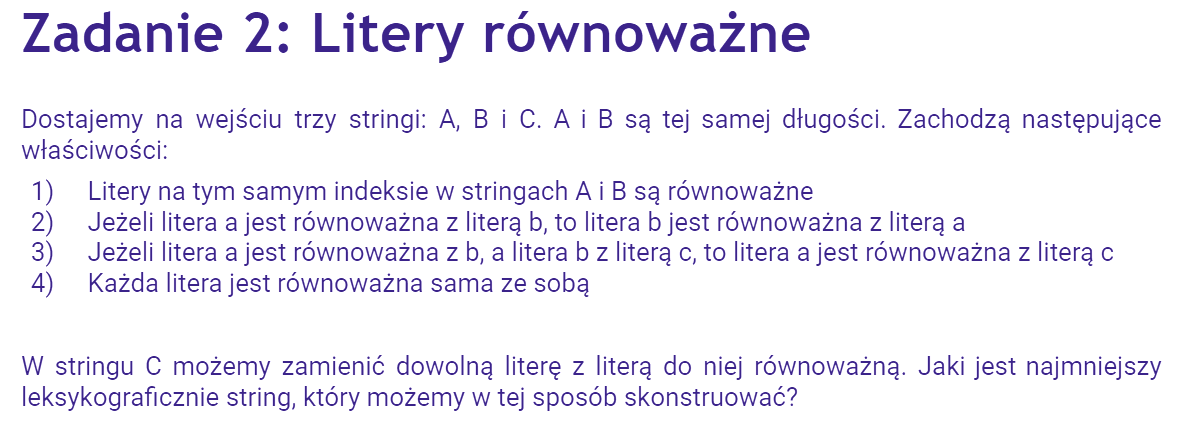

# Sposób I

### Omówienie algorytmu

###### UWAGA:
W algorytmie nie chodzi o to, by przestawiać litery w stringu $ C $. Zamiany możemy dokonać z dowolną z liter ze stringów $ A $ lub $ B $ w taki sposób, by otrzymać pożądany rezultat. 
###### Jak wygląda algorytm?
Musimy skorzystać ze struktury Find Union z wykładu (patrz <a href="../../Zadania z wykładu/Algorytmy grafowe/[Wykorzystywane przez grafowe] Rodzina zbiorów rozłącznych.ipynb">TUTAJ</a>), którą jednak nieco zmodyfikujemy. Struktura ta pozwoli nam na pogrupowanie liter, które są sobie równoważne. Grupowania będziemy dokonywać na podstawie relacji, opisanej w zadaniu, w taki sposób, że jeżeli spełnione są warunki zadania dla dwóch liter z obu stringów, to wywołamy $ union $ dla obu liter (a połączenie tych zbiorów jest zgodnie z warunkami zadania, bo relacja jest przechodnia, więc jeżeli nawet wcześniej jakaś litera z jednego zbioru nie była równoważną z literą z drugiego zbioru, to wystarczy taka jedna para, z której jedna litera należy do pierwszego zbioru, a druga do drugiego, w której obie litery są równoważne, aby całe zbiory, do których one należą, stały się równoważne). Ponieważ również zawsze będziemy chcieli wymieniać literę w stringu $ C $ na najmniejszą leksykograficznie, jaka jest do niej równoważna, musimy utrzymywać drzewo, które tworzy dany zbiór, w takim porządu, że każdy węzeł będzie prowadził do węzła, odpowiadającego najmniejszej leksykograficznie literze. Oznacza to w zasadzie tyle, że jako root musi zawsze występować najmniejsza leksykograficznie litera ze zbioru. 
<br><br>
Po przygotowaniu sobie już struktury Find Union, możemy przejść liniowo przez string $ C $ i dla każdej litery wywołać funkcję $ find $ (oczywiście, o ile dana litera występowała w stringu $ A $ lub $ B $, jeżeli nie zostanie ona znaleziona, to nie możemy jej zamieniać, bo nie istnieje litera do niej równoważna). Po znalezieniu rodzica (reprezentanta zbioru), którym zawsze jest najmniejsza leksykograficznie litera w zbiorze, zamieniamy literę w stringu $ C $ na daną literę (tak naprawdę, to stringi są niemutowalne, więc zapisujemy po prostu tę literę gdzieś w tablicy znaków, którą następnie połączymy w string i zwrócimy).

### Złożoność

###### Obliczeniowa:
$ O(n) $ - nawet, jeżeli pomijamy kompresję ścieżki (a to robimy w poniższej implementacji, bo łączymy zbiory na podstawie porządku leksykograficznego reprezentantów, a nie na podstawie rangi), to i tak maksymalnie zbiór będzie miał $ 26 $ elementów, ponieważ rozważamy tylko małe litery alfabetu łacińskiego, więc złożoność obliczeniowa zależy jedynie od długości stringów, jakie otrzymujemy na wejściu, równej $ n $.
###### Pamięciowa:
$ O(26) = O(1) $

### Implementacja

In [1]:
class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        

def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link a set of the lexicographically larger representative
    # to the set of lower representative
    if x.id < y.id:
        y.parent = x
    else:
        x.parent = y
            
            
def make_set(x: 'id'):
    return Node(x)


def replace(A, B, C):
    n = len(A)
    m = len(C)
    ord_a = ord('a')
    # Makseset for all the possible letters
    letters = [make_set(i) for i in range(26)]
    # Call union on the letters from string A and B which are placed on
    # the same indices
    for i in range(n): union(letters[ord(A[i]) - ord_a], letters[ord(B[i]) - ord_a])
    # Find the best replacement for the letters in the C string
    result = [''] * m
    for i in range(m): result[i] = chr(find(letters[ord(C[i]) - ord_a]).id + ord_a)
    # Return the result
    return ''.join(result)

###### Kilka testów

In [2]:
A = 'ccef'
B = 'fbga'
C = 'abdfe'
print(replace(A, B, C))

aadae


# Sposób II

### Omówienie algorytmu

Idea jest analogiczna do powyższego sposobu. W poniższej implementacji zostawiamy jednak kompresję ścieżki, a z tym, żeby root był zawsze najmniejszym leksykograficznie znakiem z danego zbioru, radzimy sobie nieco inaczej, a mianowicie, przepinamy $ id $ najmniejszego leksykograficznie znaku do $ id $ roota. Zauważmy, że przez to niszczymy obiekty, które odpowiadają danym literom, ale nas to nie obchodzi w poniższej implementacji, ponieważ interesuje nas tylko korzeń danego drzewa (reprezentującego zbiór), a nie $ id $ poszczególnych elementów zbioru.

### Złożoność

###### Obliczeniowa:
$ O(n) $
###### Pamięciowa:
$ O(26) = O(1) $

### Implementacja

In [3]:
class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit
        

def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
        if y.id > x.id: y.id = x.id  # <--- difference is here
    else:
        y.parent = x
        if x.id > y.id: x.id = y.id  # <--- difference is here
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1
            
            
def make_set(x: 'id'):
    return Node(x)


def replace(A, B, C):
    n = len(A)
    m = len(C)
    ord_a = ord('a')
    # Makseset for all the possible letters
    letters = [make_set(i) for i in range(26)]
    # Call union on the letters from string A and B which are placed on
    # the same indices
    for i in range(n): union(letters[ord(A[i]) - ord_a], letters[ord(B[i]) - ord_a])
    # Find the best replacement for the letters in the C string
    result = [''] * m
    for i in range(m): result[i] = chr(find(letters[ord(C[i]) - ord_a]).id + ord_a)
    # Return the result
    return ''.join(result)

###### Kilka testów

In [4]:
A = 'ccef'
B = 'fbga'
C = 'abdfe'
print(replace(A, B, C))

aadae
